<a href="https://colab.research.google.com/github/rijalammar1/PVCK_RijalAmmar/blob/main/Project_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

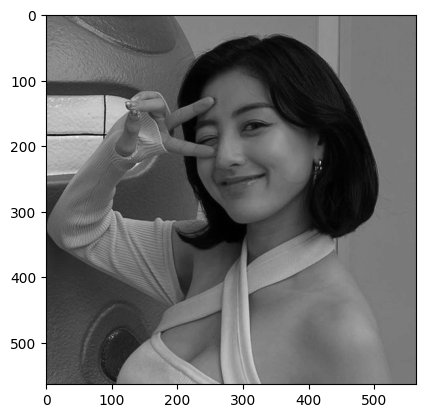

In [45]:
 #load the image
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/0c3ecdc9b8ae5d9309211d97ebcf816a.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

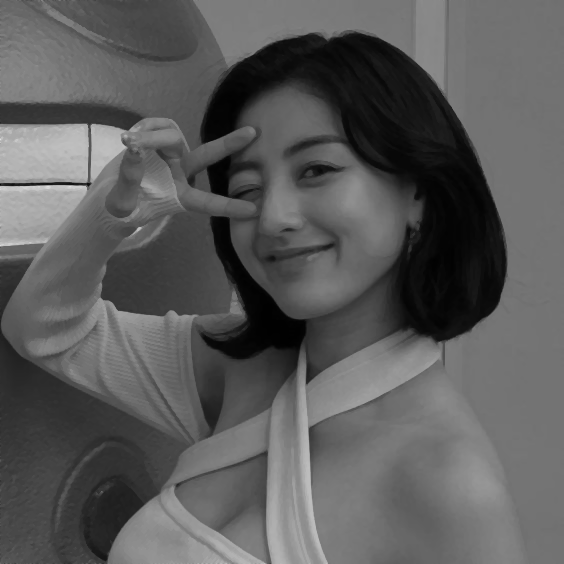

In [46]:
# MEDIAN

from cv2 import * #Import functions from OpenCV
import cv2

    # source = cv2.imread('/content/drive/MyDrive/PVCK_MM/Images/0c3ecdc9b8ae5d9309211d97ebcf816a.jpg', CV_LOAD_IMAGE_GRAYSCALE)
final = img_gray[:]
for y in range(len(img_gray)):
  for x in range(y):
      final[y,x]=img_gray[y,x]

members=[img_gray[0,0]]*9
for y in range(1,img_gray.shape[0]-1):
  for x in range(1,img_gray.shape[1]-1):
            members[0] = img_gray[y-1,x-1]
            members[1] = img_gray[y,x-1]
            members[2] = img_gray[y+1,x-1]
            members[3] = img_gray[y-1,x]
            members[4] = img_gray[y,x]
            members[5] = img_gray[y+1,x]
            members[6] = img_gray[y-1,x+1]
            members[7] = img_gray[y,x+1]
            members[8] = img_gray[y+1,x+1]

            members.sort()
            final[y,x]=members[4]

# display(final)
cv2_imshow(final)

In [21]:
# MEAN
def MF(img, FilterSize):
    output = np.zeros(img.shape, np.uint8)
    result = 0
    for a in range(1, img.shape[0]-1):
      for b in range(1, img.shape[1]-1):
        for x in range(-1, 2):
          for y in range(-1, 2):
            result = result + img[a+y, b+y]
        output[a][b] = int(result / FilterSize)
        result = 0

    return output

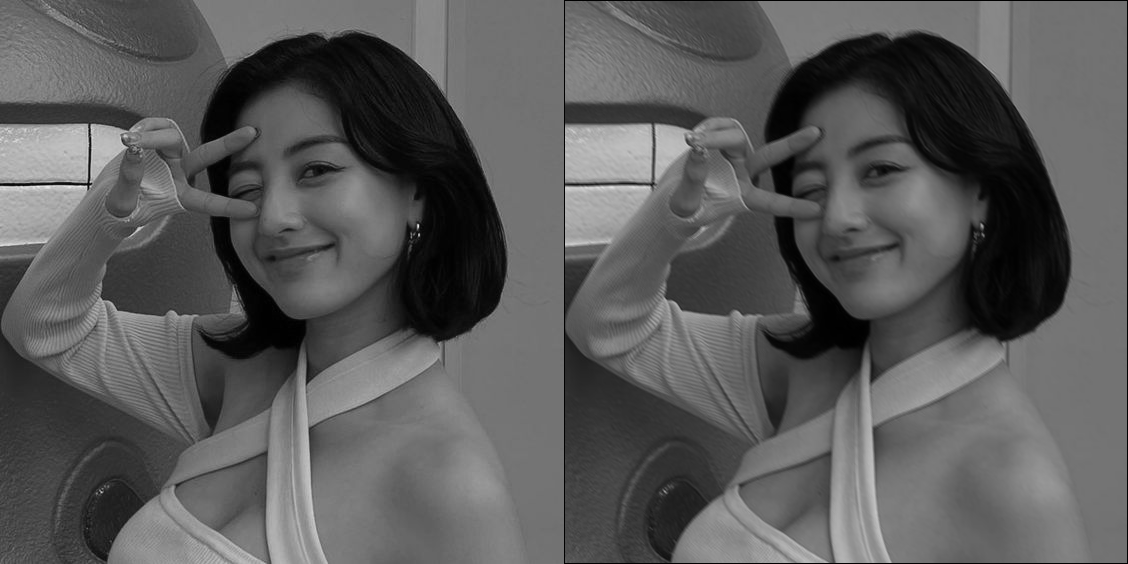

In [47]:
# Menapilkan Gambar
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/0c3ecdc9b8ae5d9309211d97ebcf816a.jpg')
ImgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mean_filtering = MF(ImgGray, 9)
final_frame = cv.hconcat((ImgGray, mean_filtering))
cv2_imshow(final_frame)

In [22]:
# LOW PASS 
def LPF(img, FilterSize):
    # array kosong
    output = np.zeros(img.shape, np.uint8)

    # variabel kosong
    result = 0

    # membuat 3 x 3 mean filter
    for a in range(1, img.shape[0]-1):
      for b in range(1, img.shape[1]-1):
        for d in range(-1, 2):
          for x in range(-1, 2):
            result = result + img[a+d, b+x]
        output[a][b] = int(result / 12)
        result = 0

    return output

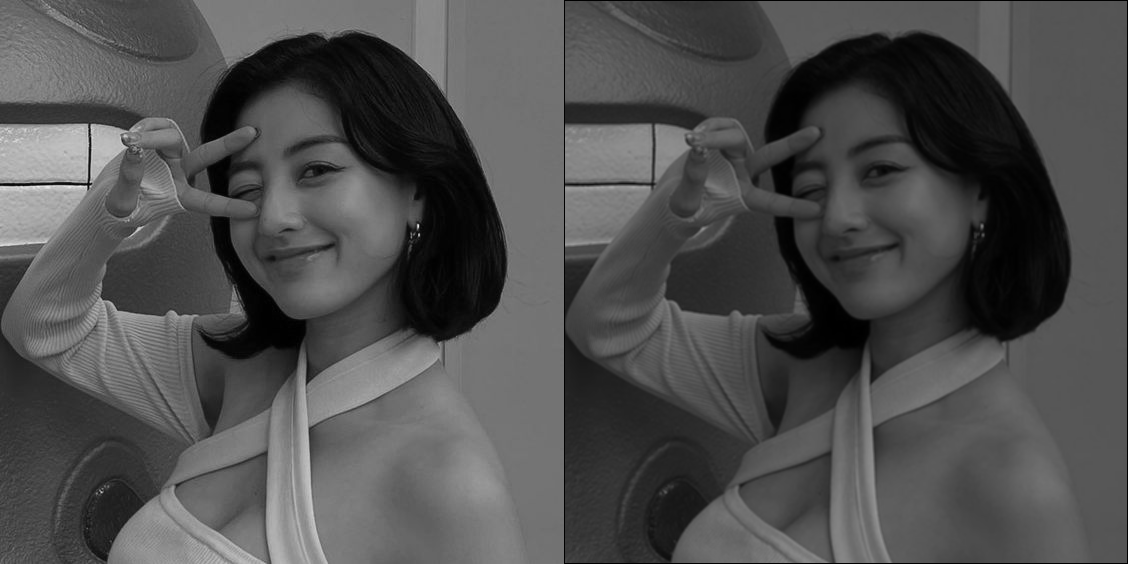

In [48]:
# Menampilkan Gambar
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/0c3ecdc9b8ae5d9309211d97ebcf816a.jpg')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
LowPass = LPF(imgGray, 9)
final_frame = cv.hconcat((imgGray, LowPass))
cv2_imshow(final_frame)

In [43]:
# Modus
def Modus(img, FilterSize):
   
    # array kosong
    output = np.zeros(img.shape, dtype=np.uint8)

    # padding pada citra input
    padding_width = FilterSize // 2
    pd_img = np.pad(img, padding_width, mode='constant')

    # Untuk iterasi pada setiap piksel citra input
    for a in range(padding_width, pd_img.shape[0] - padding_width):
        for b in range(padding_width, pd_img.shape[1] - padding_width):
            # Array kosong untuk piksel 
            Values = np.zeros(FilterSize * FilterSize, dtype=np.uint8)
            r = 0
            # iterasi pada setiap piksel
            for x in range(-padding_width, padding_width + 1):
                for y in range(-padding_width, padding_width + 1):
                    Values[r] = pd_img[a + x, b + y]
                    r += 1
            # Untuk mencari nilai modus 
            mode_value = np.bincount(Values).argmax()
            # Untuk menedapat nilai modus
            output[a - padding_width, b - padding_width] = mode_value

    return output

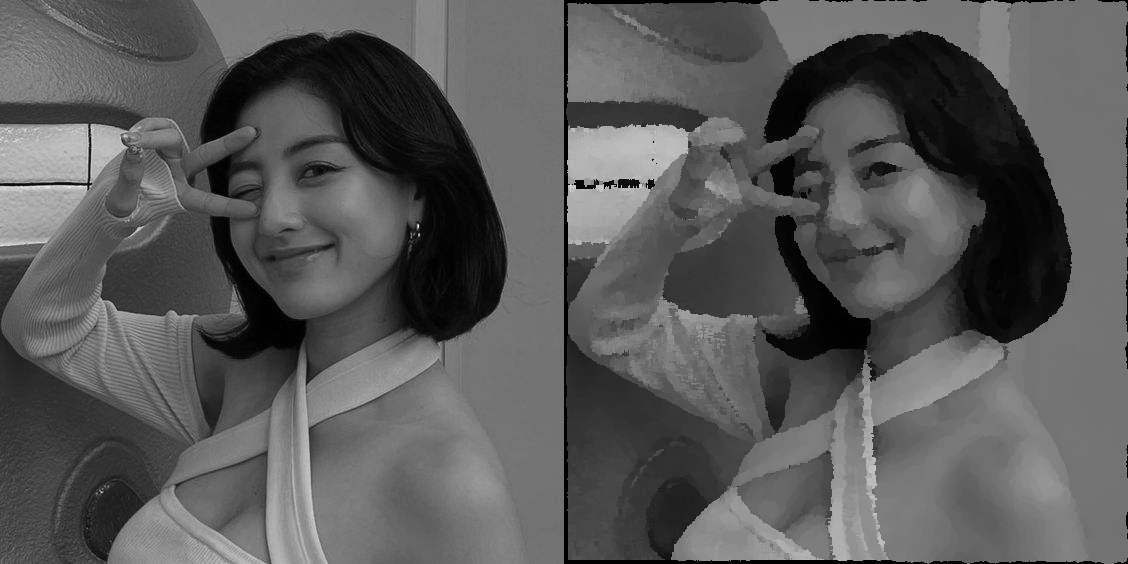

In [49]:
# Menampikan Gambar
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/0c3ecdc9b8ae5d9309211d97ebcf816a.jpg')
ImgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mode = Modus(ImgGray, 9)
final_frame = cv.hconcat((ImgGray, mode))
cv2_imshow(final_frame)